# CUDA exercises

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import itertools
%matplotlib inline

from IPython.display import display

In [35]:
def csv_parse(path, header=False, sep=";"):
    if header:
        df = pd.read_csv(path, sep=sep, names=header)
    else:
        df = pd.read_csv(path, sep=sep)
    #display(df.head())
    return df

In [36]:
def calcGB_Stride(df):
    return 3*8* df["N"]/df["k"] /1e9

def calcGB_Offset(df):
    return 3*8* (df["N"]-df["k"])/1e9

def transform_to_ms(df, cols):
    return df[cols]*1e3


# Ex6.2 SpM times Dense

In [37]:
df = csv_parse("plots/ph_data_ik.csv", header=False)
df = df.sort_values("N")
display(df)

,N,K,time_single,time_rm_stacked,time_cm_stacked
0,100,2,0.000078,0.000077,0.000076
1,100,4,0.000128,0.000104,0.000099
2,100,8,0.000226,0.000152,0.000140
3,100,16,0.000426,0.000274,0.000245
4,1024,2,0.000088,0.000082,0.000086
5,1024,4,0.000150,0.000125,0.000118
6,1024,8,0.000260,0.000239,0.000211
7,1024,16,0.000483,0.000540,0.000483
11,10000,16,0.000436,0.001282,0.000774
10,10000,8,0.000405,0.000609,0.000577


In [38]:
cols = df.columns
cols

Index(['N', 'K', 'time_single', 'time_rm_stacked', 'time_cm_stacked'], dtype='object')

In [39]:
time_cols = list(filter(lambda x: "time" in x, cols))
labels = list(map(lambda x: x.split("_",1)[-1], time_cols))
time_cols, labels

(['time_single', 'time_rm_stacked', 'time_cm_stacked'],
 ['single', 'rm_stacked', 'cm_stacked'])

In [40]:
speedup_cols = []
for x in ["time_rm_stacked", "time_cm_stacked"]:
    col_name = "speedup_"+x.split("_",1)[-1]
    speedup_cols.append(col_name)
    df[col_name] = df["time_single"] / df[x]
df

,N,K,time_single,time_rm_stacked,time_cm_stacked,speedup_rm_stacked,speedup_cm_stacked
0,100,2,0.000078,0.000077,0.000076,1.012987,1.026316
1,100,4,0.000128,0.000104,0.000099,1.230769,1.292929
2,100,8,0.000226,0.000152,0.000140,1.486842,1.614286
3,100,16,0.000426,0.000274,0.000245,1.554745,1.738776
4,1024,2,0.000088,0.000082,0.000086,1.073171,1.023256
5,1024,4,0.000150,0.000125,0.000118,1.200000,1.271186
6,1024,8,0.000260,0.000239,0.000211,1.087866,1.232227
7,1024,16,0.000483,0.000540,0.000483,0.894444,1.000000
11,10000,16,0.000436,0.001282,0.000774,0.340094,0.563307
10,10000,8,0.000405,0.000609,0.000577,0.665025,0.701906


In [41]:
Ns = df["N"].unique()
Ns

array([    100,    1024,   10000,  100489, 1000000])

In [42]:
def print_styling():

    plt.rc('figure', figsize=(14,8)) 
    SMALL_SIZE = 15
    MEDIUM_SIZE = 18
    BIGGER_SIZE = 26

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('lines', linewidth=2)

    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
print_styling()

In [43]:
tmp = np.array(df["K"].unique())
tmp.sort()
tmp

array([ 2,  4,  8, 16])

2
4
8
16


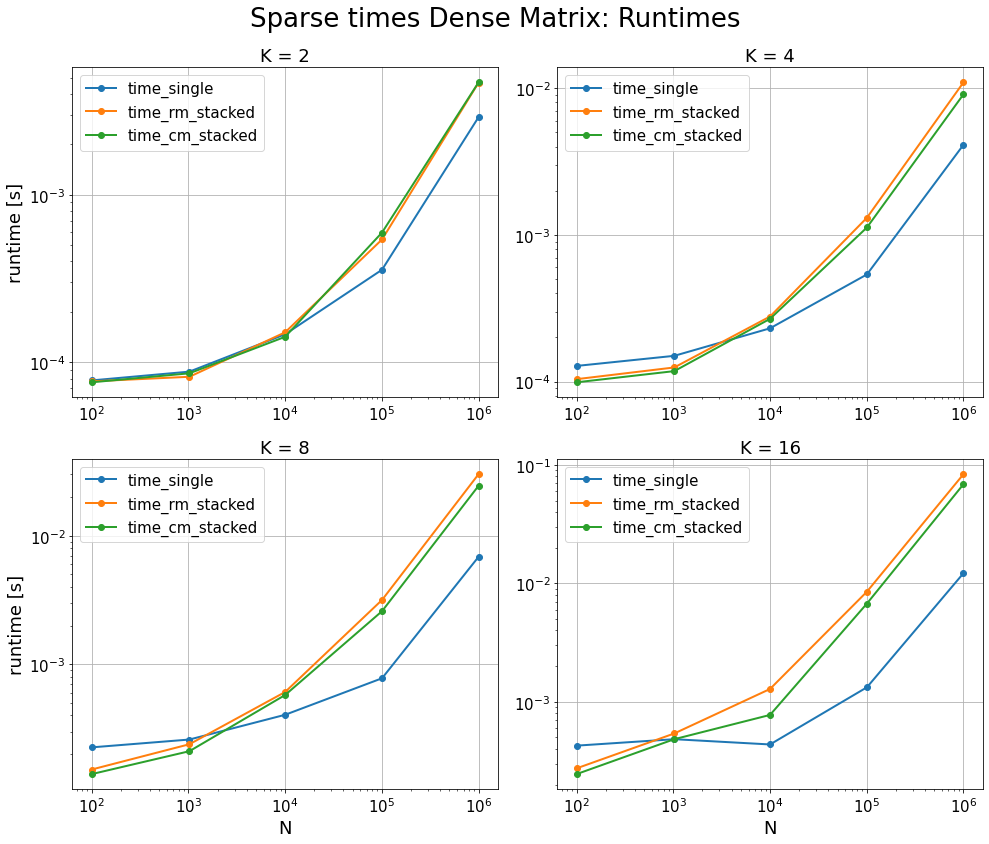

In [44]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,12))

logx, logy = True, True
if (logx and logy):
    plot_format = "loglog"
if (logx and not logy):
    plot_format = "logx"
if (not logx and logy):
    plot_format = "logy"
else:
    plot_format = "linear"

print_styling();
x = "N"
axr = axs.ravel()
i = 0
Ks = np.array(df["K"].unique())
Ks.sort()
for k in Ks:
    if k%2 == 1:
        continue
    ax = axr[i]
    i+=1
    print(k)
    df[df["K"] == k].plot(x=x, y=time_cols, logx=logx, logy=logy, marker="o", linestyle="-", ax=ax)
    #ax.legend(labels)
    ax.grid()
    ax.set_title(f"K = {k}")
    ax.set_xlabel("")

axs[0][0].set_ylabel("runtime [s]")
axs[1][0].set_ylabel("runtime [s]")
axs[1][0].set_xlabel("N")
axs[1][1].set_xlabel("N")
#df.plot(x=x, y=gpu_ref+["time_cpuref"], logx=logx, logy=logy, linestyle="--", ax=ax);



fig.suptitle("Sparse times Dense Matrix: Runtimes")
plt.tight_layout()

#fig.savefig("spTd_runtimes.pdf", bbox_inches="tight", pad_inches=0.2)

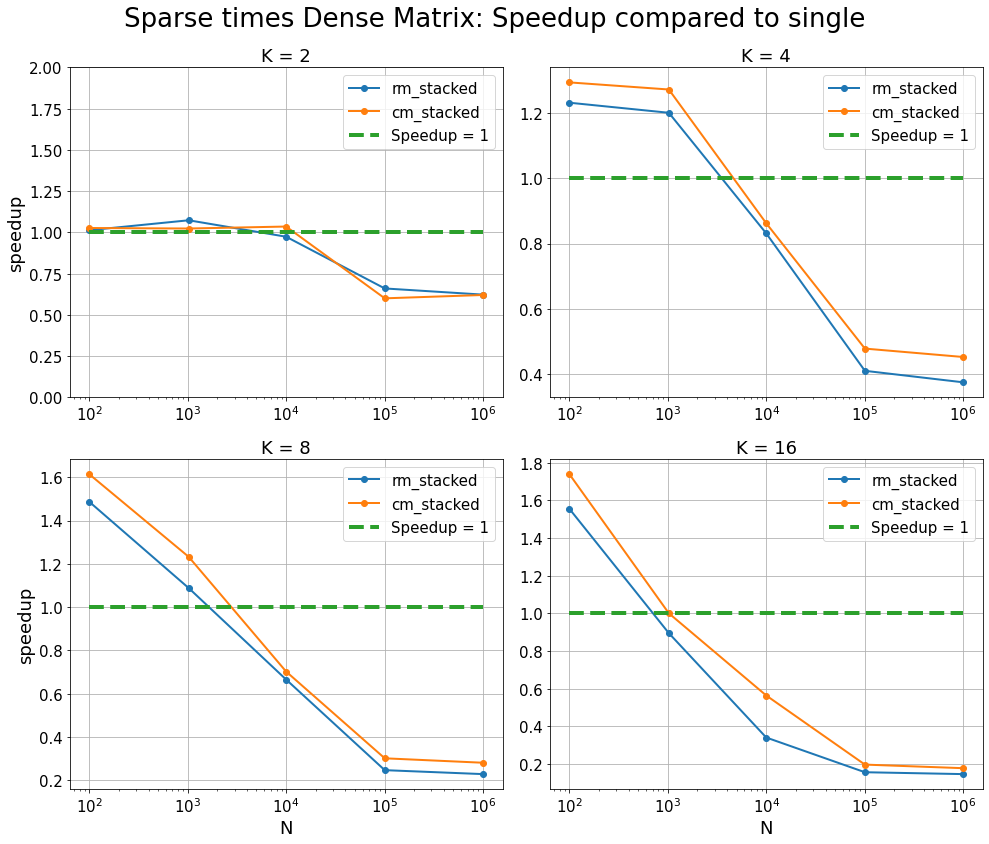

In [45]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,12))

logx, logy = True, False
if (logx and logy):
    plot_format = "loglog"
if (logx and not logy):
    plot_format = "logx"
if (not logx and logy):
    plot_format = "logy"
else:
    plot_format = "linear"

print_styling();
x = "N"
axr = axs.ravel()
i = 0
Ks = np.array(df["K"].unique())
Ks.sort()
for k in Ks:
    if k%2 == 1:
        continue
    ax = axr[i]
    i+=1
    df[df["K"] == k].plot(x=x, y=speedup_cols, logx=logx, logy=logy, marker="o", linestyle="-", ax=ax)
    ax.plot(Ns, [1]*len(Ns), linestyle="--", linewidth=4)
    ax.legend(labels[1:]+["Speedup = 1"])
    ax.grid()
    ax.set_title(f"K = {k}")
    ax.set_xlabel("")

axs[0][0].set_ylabel("speedup")
axs[1][0].set_ylabel("speedup")
axs[1][0].set_xlabel("N")
axs[1][1].set_xlabel("N")
#df.plot(x=x, y=gpu_ref+["time_cpuref"], logx=logx, logy=logy, linestyle="--", ax=ax);

axs[0][0].set_ylim([0, 2])

fig.suptitle("Sparse times Dense Matrix: Speedup compared to single")
plt.tight_layout()

fig.savefig("spTd_speedup.pdf", bbox_inches="tight", pad_inches=0.2)

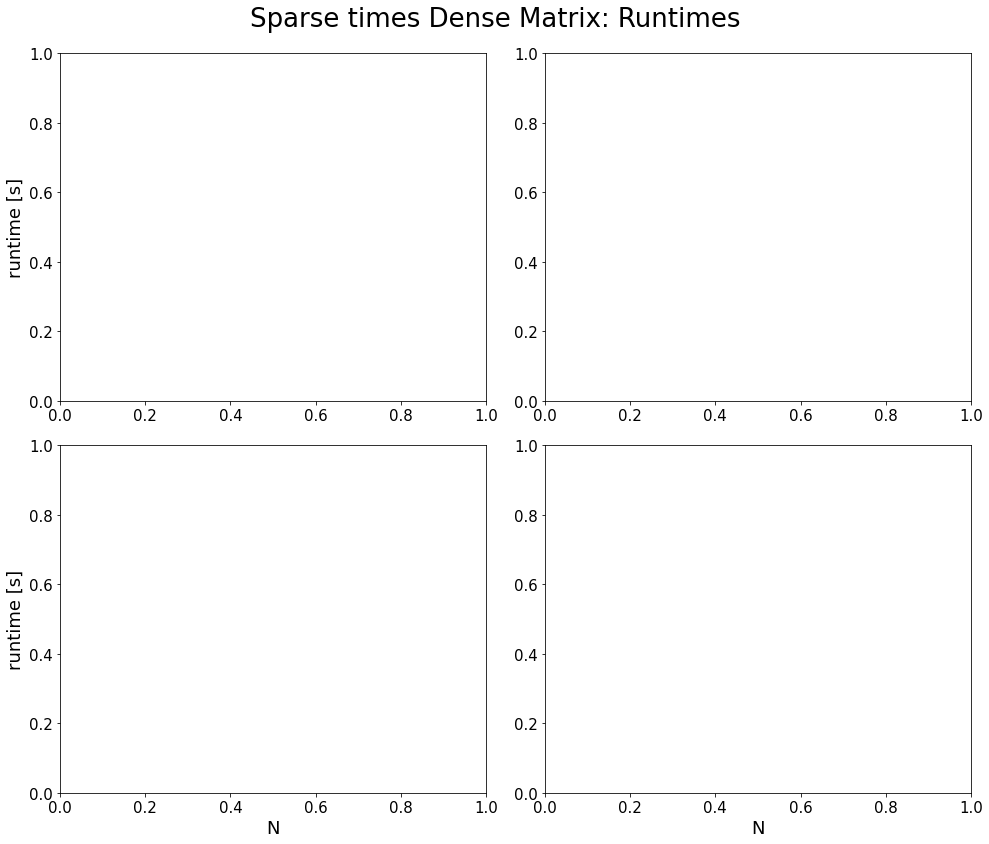

In [46]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,12))

logx, logy = True, True
if (logx and logy):
    plot_format = "loglog"
if (logx and not logy):
    plot_format = "logx"
if (not logx and logy):
    plot_format = "logy"
else:
    plot_format = "linear"

print_styling();
x = "N"
axr = axs.ravel()
i = 0
Ks = np.array(df["K"].unique())
Ks.sort()
for k in Ks:
    if k%2 == 0:
        continue
    ax = axr[i]
    i+=1
    print(k)
    df[df["K"] == k].plot(x=x, y=time_cols, logx=logx, logy=logy, marker="o", linestyle="-", ax=ax)
    ax.legend(labels)
    ax.grid()
    ax.set_title(f"K = {k}")
    ax.set_xlabel("")

axs[0][0].set_ylabel("runtime [s]")
axs[1][0].set_ylabel("runtime [s]")
axs[1][0].set_xlabel("N")
axs[1][1].set_xlabel("N")
#df.plot(x=x, y=gpu_ref+["time_cpuref"], logx=logx, logy=logy, linestyle="--", ax=ax);



fig.suptitle("Sparse times Dense Matrix: Runtimes")
plt.tight_layout()

fig.savefig("spTd_runtimes_unevenK.pdf", bbox_inches="tight", pad_inches=0.2)

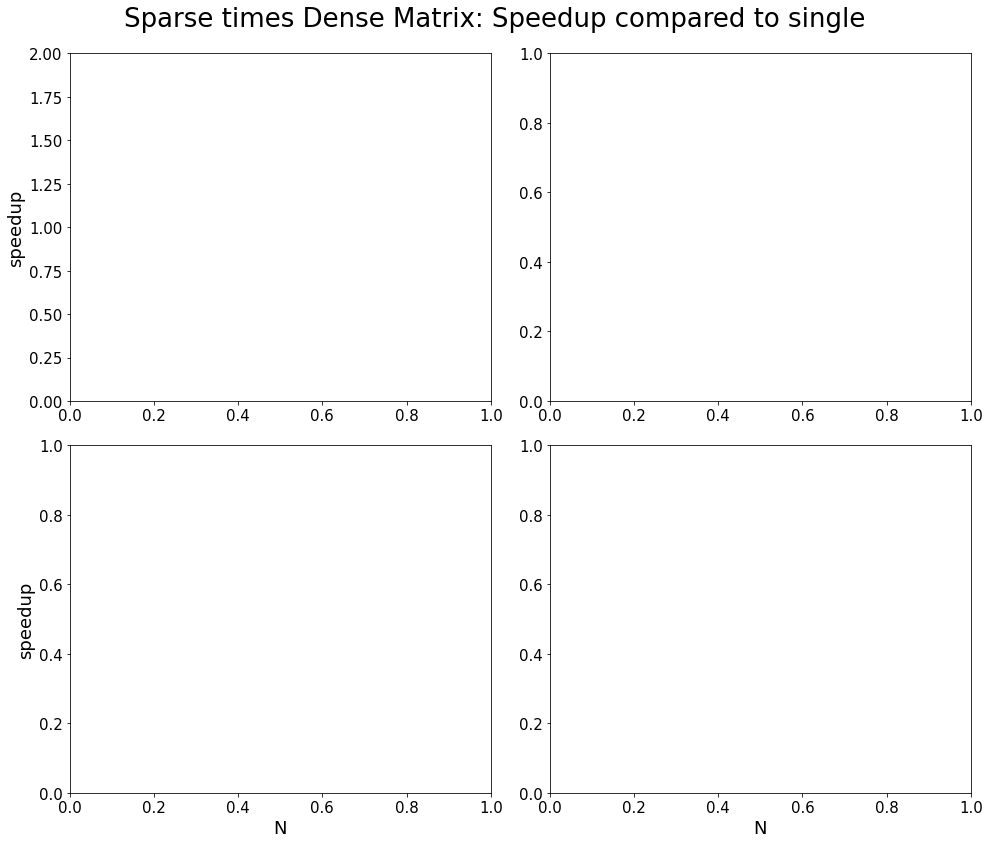

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,12))

logx, logy = True, False
if (logx and logy):
    plot_format = "loglog"
if (logx and not logy):
    plot_format = "logx"
if (not logx and logy):
    plot_format = "logy"
else:
    plot_format = "linear"

print_styling();
x = "N"
axr = axs.ravel()
i = 0
Ks = np.array(df["K"].unique())
Ks.sort()
for k in Ks:
    if k%2 == 0:
        continue
    ax = axr[i]
    i+=1
    df[df["K"] == k].plot(x=x, y=speedup_cols, logx=logx, logy=logy, marker="o", linestyle="-", ax=ax)
    ax.plot(Ns, [1]*len(Ns), linestyle="--", linewidth=4)
    ax.legend(labels[1:]+["Speedup = 1"])
    ax.grid()
    ax.set_title(f"K = {k}")
    ax.set_xlabel("")

axs[0][0].set_ylabel("speedup")
axs[1][0].set_ylabel("speedup")
axs[1][0].set_xlabel("N")
axs[1][1].set_xlabel("N")
#df.plot(x=x, y=gpu_ref+["time_cpuref"], logx=logx, logy=logy, linestyle="--", ax=ax);

axs[0][0].set_ylim([0, 2])

fig.suptitle("Sparse times Dense Matrix: Speedup compared to single")
plt.tight_layout()

fig.savefig("spTd_speedup_unevenK.pdf", bbox_inches="tight", pad_inches=0.2)